# Closest Pair of Points Problem

## Helper for Visualization

In [19]:
import matplotlib.pyplot as plt
import math

def plot_closest_points(points, idx1, idx2):
    """
    Plots a list of points and highlights the closest pair of points with a red line.
    """
    # Get the two closest points
    p1 = points[idx1]
    p2 = points[idx2]

    # Unzip all points into x and y lists for plotting
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]

    plt.figure(figsize=(8, 6))

    # Plot all points as blue dots
    plt.scatter(x_coords, y_coords, label='All Points')

    # Highlight the closest pair in red
    plt.scatter([p1[0], p2[0]], [p1[1], p2[1]], color='red', s=100, label='Closest Points')

    # Draw the line connecting the closest pair
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r--')

    plt.title('Closest Pair of Points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

## Brute-Force Algorithm (ALG1)

In [20]:
import math

In [21]:
def brute_force_closest_points(points):
    """
    :param points: List of n points, n >= 2, P[0] = (x1, y1), ..., P[n-1] = (xn, yn)
    :return: The index1 and index2 of the closest pair of points
    """
    n = len(points)
    if n < 2:
        raise ValueError("The list of points must contain at least two points.")

    d_min = float('inf')
    index_1 = -1
    index_2 = -1

    # from pseudocode: i = 1 to n-1
    for i in range(n - 1):
        # from pseudocode: j = i + 1 to n
        for j in range(i + 1, n):
            # Calculate Euclidean distance d = sqrt((x_i - x_j)^2 + (y_i - y_j)^2)
            d = math.sqrt((points[i][0] - points[j][0])**2 + (points[i][1] - points[j][1])**2)

            if d < d_min:
                d_min = d
                index_1 = i
                index_2 = j

    return index_1, index_2

### Example Usage of Brute-Force Algorithm

The list of points is: [(1, 2), (3, 3), (2, 8), (8, 1), (4, 6), (7, 5)]
The closest pair of points are at indices: 0 and 1
The points are: (1, 2) and (3, 3)


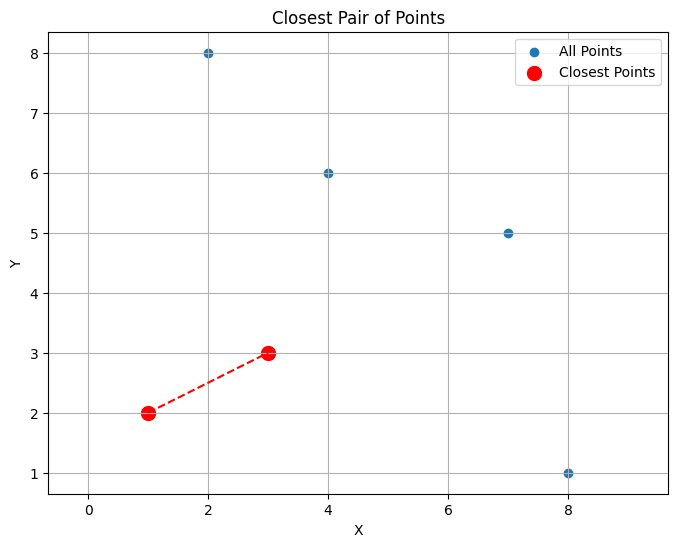

In [22]:
points = [(1, 2), (3, 3), (2, 8), (8, 1), (4, 6), (7, 5)]
idx1, idx2 = brute_force_closest_points(points)

print(f"The list of points is: {points}")
print(f"The closest pair of points are at indices: {idx1} and {idx2}")
print(f"The points are: {points[idx1]} and {points[idx2]}")

plot_closest_points(points, idx1, idx2)

The list of points is: [(0, 0), (10, 10), (0, 1), (5, 5), (3, 3), (8, 8)]
The closest pair of points are at indices: 0 and 2
The points are: (0, 0) and (0, 1)


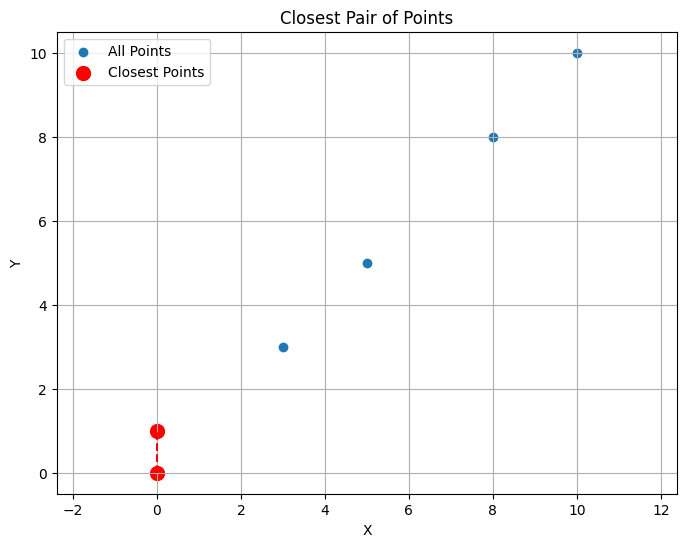

In [23]:
points_2 = [(0, 0), (10, 10), (0, 1), (5, 5), (3, 3), (8, 8)]
idx1_2, idx2_2 = brute_force_closest_points(points_2)

print(f"The list of points is: {points_2}")
print(f"The closest pair of points are at indices: {idx1_2} and {idx2_2}")
print(f"The points are: {points_2[idx1_2]} and {points_2[idx2_2]}")

plot_closest_points(points_2, idx1_2, idx2_2)

## Divide-and-Conquer Algorithm (ALG2)

In [31]:
def distance(p1, p2):
    """
    :param p1: First point (x1, y1)
    :param p2: Second point (x2, y2)
    :return: Euclidean distance between p1 and p2
    """
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [32]:
def _divide_and_conquer_closest_points_rec(Px, Py):
    """
    :param Px: List of points sorted by x-coordinate
    :param Py: List of points sorted by y-coordinate
    :return: A tuple (p_star_1, p_star_2) representing the closest pair
    """
    n = len(Px)

    # --- 1. Base Case ---
    # if |P| <= 3 find the closest pair by measuring all pairwise distances
    if n <= 3:
        # basically the brute-force approach
        min_dist = float('inf')
        p1, p2 = None, None
        for i in range(n):
            for j in range(i + 1, n):
                d = distance(Px[i], Px[j])
                if d < min_dist:
                    min_dist = d
                    p1, p2 = Px[i], Px[j]
        return p1, p2

    # --- 2. Divide ---
    # Construct Qx, Qy, Rx, Ry in O(n) time
    mid = n // 2
    Qx = Px[:mid]
    Rx = Px[mid:]

    Qx_set = set(Qx)  # for O(1) lookups
    Qy = []
    Ry = []
    for p in Py:
        if p in Qx_set:
            Qy.append(p)
        else:
            Ry.append(p)

    # --- 3. Conquer ---
    (q0_star, q1_star) = _divide_and_conquer_closest_points_rec(Qx, Qy)
    (r0_star, r1_star) = _divide_and_conquer_closest_points_rec(Rx, Ry)

    # --- 4. Combine ---
    d_q = distance(q0_star, q1_star)
    d_r = distance(r0_star, r1_star)
    delta = min(d_q, d_r)
    x_star = Qx[-1][0]  # maximum x-coordinate of a point in set Q

    # L = {(x, y): x = x*}
    # S = points in P within distance delta of L
    # Construct Sy in O(n) time
    Sy = [p for p in Py if abs(p[0] - x_star) < delta]

    min_d_pair = float('inf')
    s_s_prime = (None, None)

    # for each point s in Sy
    # compute the distance from s to each of the next 15 points in Sy
    len_Sy = len(Sy)
    for i in range(len_Sy):
        for j in range(i + 1, min(i + 16, len_Sy)):
            s = Sy[i]
            s_prime = Sy[j]

            d_s_to_s_prime = distance(s, s_prime)

            if d_s_to_s_prime < min_d_pair:
                min_d_pair = d_s_to_s_prime
                s_s_prime = (s, s_prime)

    # let s_s_prime (s, s') be the pair with the minimum distance (min_d_pair)
    if min_d_pair < delta:
        return s_s_prime
    elif d_q < d_r:
            return q0_star, q1_star
    else:
        return r0_star, r1_star

In [33]:
def divide_and_conquer_closest_points(points: list):
    """
    :param points: List of n points, n >= 2, P[0] = (x1, y1), ..., P[n-1] = (xn, yn)
    :return: The index1 and index2 of the closest pair of points
    """
    # construct Px and Py in O(nlogn) time
    Px = sorted(points, key=lambda p: p[0])
    Py = sorted(points, key=lambda p: p[1])

    # (p0*, p1*) = closest_pair_rec(Px, Py)
    (p0_star, p1_star) = _divide_and_conquer_closest_points_rec(Px, Py)

    # return the indices instead of the actual point
    # look for p0_star and p1_star in the original points list
    index_1 = points.index(p0_star)
    index_2 = points.index(p1_star)
    return index_1, index_2


### Example Usage of Divide-and-Conquer Algorithm

The list of points is: [(1, 2), (3, 3), (2, 8), (8, 1), (4, 6), (7, 5)]
The closest pair of points are at indices: 0 and 1
The points are: (1, 2) and (3, 3)


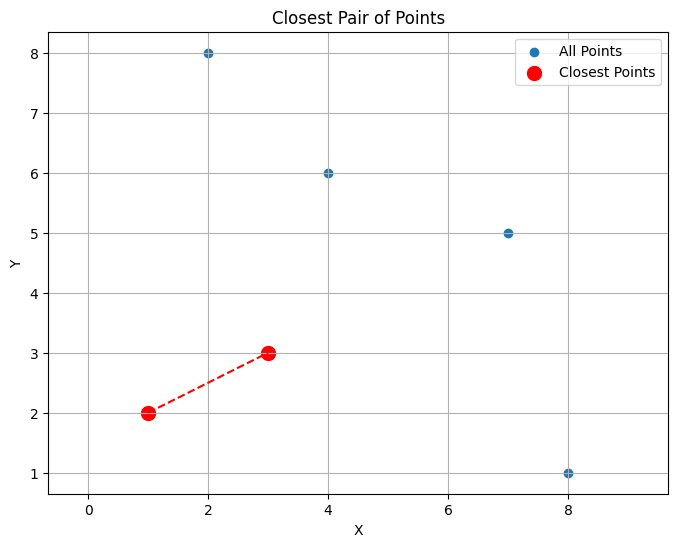

In [34]:
# Define a list of points (x, y)
points = [(1, 2), (3, 3), (2, 8), (8, 1), (4, 6), (7, 5)]

# Find the closest pair
idx1, idx2 = divide_and_conquer_closest_points(points)

print(f"The list of points is: {points}")
print(f"The closest pair of points are at indices: {idx1} and {idx2}")
print(f"The points are: {points[idx1]} and {points[idx2]}")

plot_closest_points(points, idx1, idx2)

The list of points is: [(0, 0), (10, 10), (0, 1), (5, 5), (3, 3), (8, 8)]
The closest pair of points are at indices: 0 and 2
The points are: (0, 0) and (0, 1)


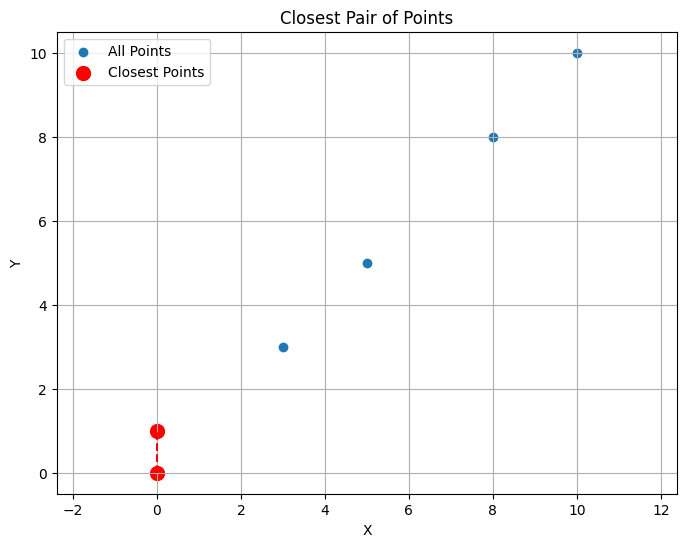

In [35]:
points_2 = [(0, 0), (10, 10), (0, 1), (5, 5), (3, 3), (8, 8)]
idx1_2, idx2_2 = divide_and_conquer_closest_points(points_2)

print(f"The list of points is: {points_2}")
print(f"The closest pair of points are at indices: {idx1_2} and {idx2_2}")
print(f"The points are: {points_2[idx1_2]} and {points_2[idx2_2]}")

plot_closest_points(points_2, idx1_2, idx2_2)

## Comparison of Empirical Runtimes

In [29]:
import time
import random

def main():
    m = 10  # number of iterations

    # Dictionaries to store the final average times, indexed by n
    t_avg_ALG1 = {}
    t_avg_ALG2 = {}

    # for n = 10^4; n <= 55 * 10^3; n = n + 5 * 10^3
    # This range is 10k, 15k, ..., 55k
    for n in range(10**4, (55 * 10**3) + 1, 5 * 10**3):
        print(f"Running tests for n = {n}...")

        # Lists to store runtimes for the 'm' iterations for the *current* 'n'
        times_alg1_for_n = []
        times_alg2_for_n = []

        # for j = 0 to m-1
        for j in range(m):
            # Generate n distinct points
            P = set()
            while len(P) < n:
                # Generate random x and y coordinates
                x = random.randint(0, 32_767)
                y = random.randint(0, 32_767)
                # Add to set to guarantee distinctness
                P.add((x, y))

            # Convert set to list (knowing all points are distinct)
            points = list(P)

            brute_force_points = points.copy()

            # compute ALG1:EmpiricalRT for the jth iteration
            t1 = time.perf_counter_ns()
            brute_force_closest_points(points)
            t2 = time.perf_counter_ns()
            times_alg1_for_n.append(t2 - t1)
            print("ALG1 Brute-force iteration", j + 1, "completed. Duration (ns):", t2 - t1)

            divide_and_conquer_points = points.copy()

            # compute ALG2:EmpiricalRT for the jth iteration
            t1 = time.perf_counter_ns()
            divide_and_conquer_closest_points(points)
            t2 = time.perf_counter_ns()
            times_alg2_for_n.append(t2 - t1)
            print("ALG2 Divide-and-conquer iteration", j + 1, "completed. Duration (ns):", t2 - t1)

            print('points are equal:', all(a == b for a, b in zip(brute_force_points, divide_and_conquer_points)))


        # compute t_avg_ALG1 and t_avg_ALG2 for n points
        t_avg_ALG1[n] = sum(times_alg1_for_n) / m
        t_avg_ALG2[n] = sum(times_alg2_for_n) / m

        print('All times for ALG1 (ns):', times_alg1_for_n)
        print('All times for ALG2 (ns):', times_alg2_for_n)

        print(f"Average ALG1 time for n={n}: {t_avg_ALG1[n] / (10**6):.6f} milliseconds")
        print(f"Average ALG2 time for n={n}: {t_avg_ALG2[n] / (10**6):.6f} milliseconds\n")

    print("\n--- Final Average Runtimes (milliseconds) ---")
    print("n\t|\tALG1 (Brute)\t|\tALG2 (D&C)")
    print("-" * 100)
    for n_val in t_avg_ALG1:
        print(f"{n_val}\t|\t{t_avg_ALG1[n_val] / (10**6):.6f}\t|\t{t_avg_ALG2[n_val] / (10**6):.6f}")

In [30]:
main()

Running tests for n = 10000...
ALG1 Brute-force iteration 1 completed. Duration (ns): 5921571500
ALG2 Divide-and-conquer iteration 1 completed. Duration (ns): 58472000
points are equal: True
All times for ALG1 (ns): [5921571500]
All times for ALG2 (ns): [58472000]
Average ALG1 time for n=10000: 5921.571500 milliseconds
Average ALG2 time for n=10000: 58.472000 milliseconds

Running tests for n = 15000...
ALG1 Brute-force iteration 1 completed. Duration (ns): 13796094000
ALG2 Divide-and-conquer iteration 1 completed. Duration (ns): 95916400
points are equal: True
All times for ALG1 (ns): [13796094000]
All times for ALG2 (ns): [95916400]
Average ALG1 time for n=15000: 13796.094000 milliseconds
Average ALG2 time for n=15000: 95.916400 milliseconds

Running tests for n = 20000...


KeyboardInterrupt: 

In [ ]:
# 1 second = 10^9 nanoseconds
# 1 millisecond = 10^6 nanoseconds